In [1]:
# Imports - these are all the imports needed for the assignment
%matplotlib inline
from scipy import stats
import numpy.ma as ma
from scipy.stats import kstest, normaltest

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1a) Load the nba csv files

# YOUR CODE HERE
df_2007 = pd.read_csv('clean_players_2007.csv')

In [3]:
df_2007

,Unnamed: 0,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
0,0,201166,Aaron Brooks,1610612745,HOU,23.0,51,36,15,0.706,...,328,333,277,277,202,314,222,17,5,"201166,1610612745"
1,1,201189,Aaron Gray,1610612741,CHI,23.0,61,23,38,0.377,...,149,211,230,303,219,311,146,17,5,"201189,1610612741"
2,2,1425,Aaron Williams,1610612746,LAC,36.0,30,9,21,0.300,...,355,310,336,381,384,351,222,17,5,"1425,1610612746"
3,3,201151,Acie Law,1610612737,ATL,23.0,56,25,31,0.446,...,211,343,288,305,343,319,222,17,5,"201151,1610612737"
4,4,1502,Adonal Foyle,1610612753,ORL,33.0,82,52,30,0.634,...,275,366,399,399,212,359,222,17,5,"1502,1610612753"
5,5,1559,Adrian Griffin,1610612760,SEA,33.0,35,10,25,0.286,...,377,407,439,402,164,377,222,17,5,"1559,1610612760"
6,6,1733,Al Harrington,1610612744,GSW,28.0,81,48,33,0.593,...,148,14,124,79,92,105,75,17,5,"1733,1610612744"
7,7,201143,Al Horford,1610612737,ATL,22.0,81,37,44,0.457,...,107,12,127,140,297,85,29,17,5,"201143,1610612737"
8,8,2744,Al Jefferson,1610612750,MIN,23.0,82,22,60,0.268,...,1,71,42,22,445,15,3,17,5,"2744,1610612750"
9,9,201154,Al Thornton,1610612746,LAC,24.0,79,23,56,0.291,...,88,101,73,93,429,132,75,17,5,"201154,1610612746"


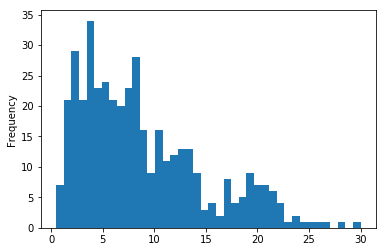

In [4]:
df_2007['PTS'].plot.hist(bins=40)

In [5]:
df_2007.columns[1:]
#pts_2016 = df_2016.as_matrix(columns=df_2016.columns[27:])
#x = pts_2016 #The array needs to be larger than 20, just an example
#mx = ma.masked_array(x)
#z,pval = mstats.normaltest(mx)

#if(pval < 0.055):
#   print("Not normal distribution")

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK',
       'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK',
       'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK',
       'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK',
       'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK',
       'TD3_RANK', 'CFID', 'CFPARAMS'],
      dtype='object')

In [7]:
z,pval = stats.normaltest(df_2007['PTS'])
print(z, pval)
if(pval < 0.05):
    print('PTS Is not from a Normal Dist')
else:
    print('PTS Is likley from a Normal Dist')

size = df_2007['PTS'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2007['PTS'])
stat, kpval = kstest(df_2007['PTS'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Gamma Dist')
else:
    print('PTS Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2007['PTS'])
stat, kpval = kstest(df_2007['PTS'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Log norm Dist')
else:
    print('PTS Is likley from a Log norm Dist')

50.514745942 1.07364891937e-11
PTS Is not from a Normal Dist
0.0364083830093 0.644653778288
PTS Is likley from a Gamma Dist
0.0357747581398 0.670064636635
PTS Is likley from a Log norm Dist


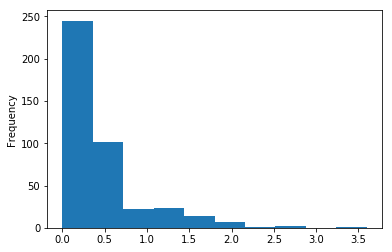

In [8]:
df_2007['BLK'].plot.hist(bins=10)

In [9]:
z,pval = stats.normaltest(df_2007['BLK'])
print(z, pval)
if(pval < 0.05):
    print('BLK Is not from a Normal Dist')
else:
    print('BLK Is likley from a Normal Dist')
    
size = df_2007['BLK'].size
x = scipy.arange(size)
param = stats.expon.fit(df_2007['BLK'])
stat, kpval = kstest(df_2007['BLK'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Exponen Dist')
else:
    print('BLK Is likley from a Exponen Dist')
param = stats.gamma.fit(df_2007['BLK'])
stat, kpval = kstest(df_2007['BLK'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Gamma Dist')
else:
    print('BLK Is likley from a Gamma Dist')
param = stats.lognorm.fit(df_2007['BLK'])
stat, kpval = kstest(df_2007['BLK'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Log norm Dist')
else:
    print('BLK Is likley from a Log norm Dist')
param = stats.chi2.fit(df_2007['BLK'])
stat, kpval = kstest(df_2007['BLK'], 'chi2', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Chisq Dist')
else:
    print('BLK Is likley from a Chisq Dist')


215.717673808 1.43715069115e-47
BLK Is not from a Normal Dist
0.126794245547 2.56590364955e-06
BLK Is not from a Exponen Dist
0.571210963302 0.0
BLK Is not from a Gamma Dist
0.121372215765 7.9889491682e-06
BLK Is not from a Log norm Dist
0.351586251177 0.0
BLK Is not from a Chisq Dist


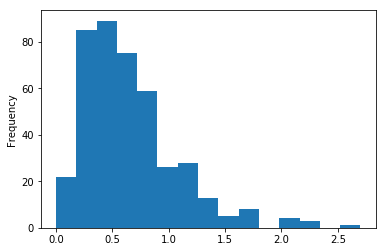

In [10]:
df_2007['STL'].plot.hist(bins=15)

In [11]:
z,pval = stats.normaltest(df_2007['STL'])
print(z, pval)
if(pval < 0.05):
    print('STL Is not from a Normal Dist')
else:
    print('STL Is likley from a Normal Dist')
    
size = df_2007['STL'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2007['STL'])
stat, kpval = kstest(df_2007['STL'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Gamma Dist')
else:
    print('STL Is likley from a Gamma Dist')

param = stats.expon.fit(df_2007['STL'])
stat, kpval = kstest(df_2007['STL'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Exponen Dist')
else:
    print('STL Is likley from a Exponen Dist')

param = stats.lognorm.fit(df_2007['STL'])
stat, kpval = kstest(df_2007['STL'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Log norm Dist')
else:
    print('STL Is likley from a Log norm Dist')
    

100.04762007 1.88336865455e-22
STL Is not from a Normal Dist
0.059602233746 0.0985475391358
STL Is likley from a Gamma Dist
0.216589937675 0.0
STL Is not from a Exponen Dist
0.0650892067816 0.0553793897248
STL Is likley from a Log norm Dist


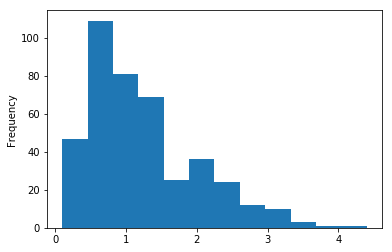

In [13]:
df_2007['TOV'].plot.hist(bins=12)

In [14]:
z,pval = stats.normaltest(df_2007['TOV'])
print(z, pval)
if(pval < 0.05):
    print('TOV Is not from a Normal Dist')
else:
    print('TOV Is likley from a Normal Dist')
    
size = df_2007['TOV'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2007['TOV'])
stat, kpval = kstest(df_2007['TOV'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Gamma Dist')
else:
    print('TOV Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2007['TOV'])
stat, kpval = kstest(df_2007['TOV'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Log norm Dist')
else:
    print('TOV Is likley from a Log norm Dist')

61.1323461045 5.31226474349e-14
TOV Is not from a Normal Dist
0.0506517483079 0.226375053894
TOV Is likley from a Gamma Dist
0.0468503008588 0.309438157393
TOV Is likley from a Log norm Dist


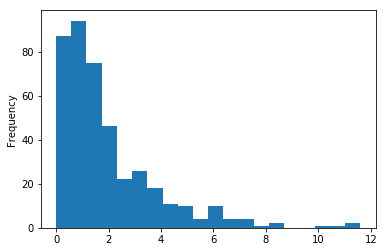

In [15]:
df_2007['AST'].plot.hist(bins=20)

In [16]:
z,pval = stats.normaltest(df_2007['AST'])
print(z, pval)
if(pval < 0.05):
    print('AST Is not from a Normal Dist')
else:
    print('AST Is likley from a Normal Dist')

size = df_2007['AST'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2007['AST'])
stat, kpval = kstest(df_2007['AST'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Gamma Dist')
else:
    print('AST Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2007['AST'])
stat, kpval = kstest(df_2007['AST'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Log norm Dist')
else:
    print('AST Is likley from a Log norm Dist')

178.42287583 1.80287157259e-39
AST Is not from a Normal Dist
0.0493128906157 0.253418275616
AST Is likley from a Gamma Dist
0.0349355213615 0.687386879864
AST Is likley from a Log norm Dist


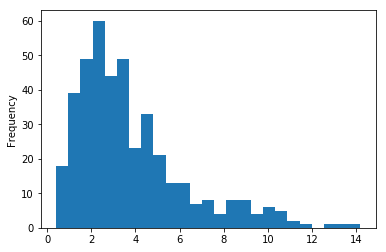

In [17]:
df_2007['REB'].plot.hist(bins=25)

In [19]:
z,pval = stats.normaltest(df_2007['REB'])
print(z, pval)
if(pval < 0.05):
    print('REB Is not from a Normal Dist')
else:
    print('REB Is likley from a Normal Dist')
    
size = df_2007['REB'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2007['REB'])
stat, kpval = kstest(df_2007['REB'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Gamma Dist')
else:
    print('REB Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2007['REB'])
stat, kpval = kstest(df_2007['REB'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Log norm Dist')
else:
    print('REB Is likley from a Log norm Dist')

99.2106271108 2.86210821236e-22
REB Is not from a Normal Dist
0.0424372744209 0.431483937841
REB Is likley from a Gamma Dist
0.0255962156827 0.947047406222
REB Is likley from a Log norm Dist
